## DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise

In [ ]:
Here’s a brief explanation of DBSCAN in 10 points:

1.] Definition: DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise1

2.] Type: It's an unsupervised machine learning algorithm used for clustering2

3.] Core Concept: It groups data points that are closely packed together
                  marking areas of high density separated by areas of low density1

4.] Noise Handling: DBSCAN can identify and separate noise (outliers) from clusters3

5.] Shape Flexibility: Unlike K-Means, DBSCAN can find clusters of any shape1

6.] Parameters: Two main parameters - eps (epsilon): the radius of the neighborhood around a point
            and minPts: the minimum number of points required to form a dense region1

7.] Core Points: Points that have at least minPts within their eps radius are considered core points1

8.] Border Points: Points that are within the eps radius of a core point but have fewer than minPts within their own eps radius1

9.] Applications: Used in data cleaning, anomaly detection, and identifying patterns in spatial data3

10.] Advantages: Automatically determines the number of clusters and handles outliers effectively1

# Analysis Project Idea on DBSCAN

# Step-by-Step Implementation

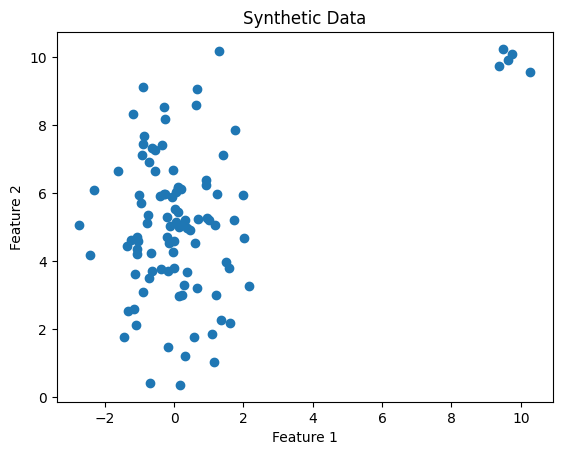

Silhouette Score: 0.07555468498659132
Number of Anomalies: 21


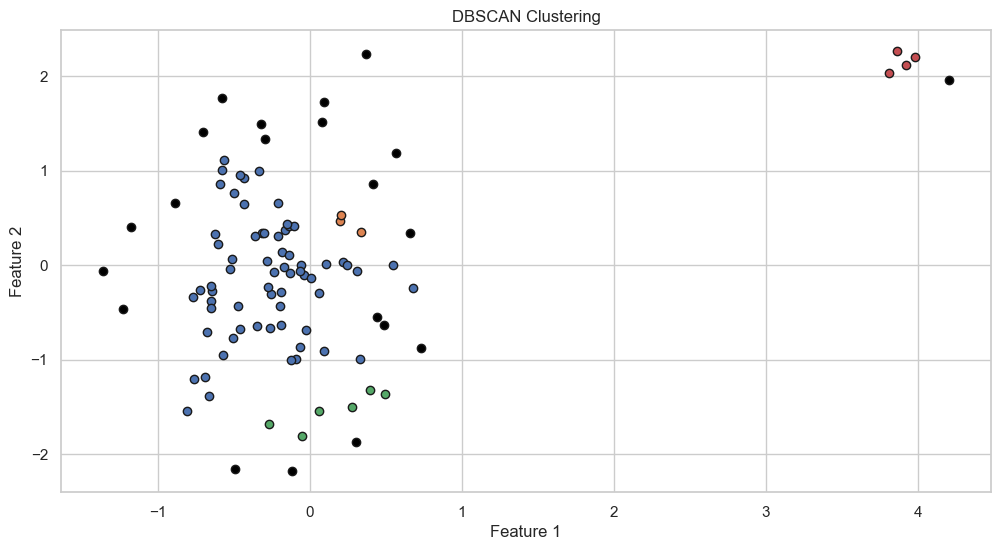

In [8]:
# Step 1: Generate Synthetic Data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset
data = {
    'feature_1': np.random.normal(0, 1, 100),
    'feature_2': np.random.normal(5, 2, 100)
}

# Introduce anomalies
data['feature_1'][95:] = np.random.normal(10, 0.5, 5)
data['feature_2'][95:] = np.random.normal(10, 0.5, 5)

df = pd.DataFrame(data)

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(df['feature_1'], df['feature_2'])
plt.title('Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Step 2: Apply DBSCAN
from sklearn.cluster import DBSCAN

# Set parameters
eps = 0.3  # Reduce epsilon for denser regions
min_samples = 3  # Reduce min_samples for smaller clusters

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(df_scaled)

# Step 3: Anomaly Detection
# Core samples (non-noise points) have label != -1
labels = dbscan.labels_
unique_labels = set(labels)
anomalies = df[labels == -1]

# Step 4: Evaluate Performance
from sklearn.metrics import silhouette_score

# Filter out noise points for silhouette score calculation
core_samples_mask = labels != -1
if len(unique_labels) > 1:
    sil_score = silhouette_score(df_scaled[core_samples_mask], labels[core_samples_mask])
else:
    sil_score = 'Not applicable'

print(f'Silhouette Score: {sil_score}')
print(f'Number of Anomalies: {len(anomalies)}')

# Step 5: Visualize Clusters and Anomalies
import seaborn as sns

# Assign colors to each cluster
sns.set(style='whitegrid')
palette = sns.color_palette('deep', len(unique_labels))

# Scatter plot of clusters
plt.figure(figsize=(12, 6))
for label, color in zip(unique_labels, palette):
    if label == -1:
        # Black for noise
        color = [0, 0, 0, 1]
    class_member_mask = (labels == label)
    plt.plot(df_scaled[class_member_mask, 0], df_scaled[class_member_mask, 1], 'o', markerfacecolor=tuple(color), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
Silhouette Score: 0.07555468498659132
Number of Anomalies: 21

In [ ]:
Silhouette Score: 0.075: This low score suggests that the clusters are not very well-defined.
                         Points within the clusters are not much closer to each other compared to points in different clusters.
                         It indicates that the data points are somewhat loosely clustered or poorly separated.

Number of Anomalies: 21: Out of 100 data points, 21 have been classified as anomalies (noise) by DBSCAN.
                         These are the points that don't fit well into any cluster, based on the given parameters.

It's clear the clustering isn't ideal

# Results Display: Print the silhouette score and the number of anomalies detected to summarize the results.

# Silhouette Score: Measures clustering quality, ranging from -1 (incorrect clustering) to 1 (perfect clustering).

# Number of Anomalies: Counts data points classified as noise and labeled -1 by DBSCAN.

In [ ]:
1.] Import Libraries: Import necessary libraries: pandas, numpy, StandardScaler from sklearn.preprocessing, 
                     and matplotlib for visualization.

2.] Generate Synthetic Data: Create a synthetic dataset using numpy with 100 points each for feature_1 and feature_2. 
                             Introduce anomalies in the last 5 points by shifting the mean.

3.] Create DataFrame: Convert the synthetic data into a pandas DataFrame for easier manipulation.

4.] Normalize Data: Use StandardScaler to normalize the dataset, ensuring all features have a mean of 0 
                     and standard deviation of 1.

5.] Visualize Data: Plot the synthetic data using matplotlib to visualize the data distribution and anomalies.

6.] Apply DBSCAN: Import DBSCAN from sklearn.cluster, set parameters eps and min_samples, 
                  and fit the normalized data to DBSCAN to detect clusters and noise points.

7.] Anomaly Detection: Identify anomalies as points with a DBSCAN label of -1 and separate them from core samples.

8.] Evaluate Performance: Calculate the silhouette score using sklearn.metrics.silhouette_score 
                          to evaluate the clustering performance, excluding noise points.

9.] Visualize Clusters and Anomalies: Import seaborn, assign colors to each cluster, and plot the clusters
                                      with different colors.Noise points (anomalies) are marked in black.

10.] Results Display: Print the silhouette score and the number of anomalies detected to summarize the results.